In [89]:
# Librerias generales
import pandas as pd
import numpy as np
import sqlite3 as sql ### para conectarse a BD
from sklearn.impute import SimpleImputer
import plotly.express as px
from sklearn import linear_model

# Librerias e visualización
import seaborn as sns
import matplotlib
##matplotlib.use('TkAgg')
%matplotlib notebook
matplotlib.use('agg')
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from ydata_profiling  import ProfileReport

NOTA: SE CAMBIAN TODAS LAS FECHAS DESDE EL FORMATO DE EXCEL

In [2]:
###Lectura base de asegurados expuestos
df = pd.read_csv('BD_Asegurados_Expuestos.csv', sep = ';')
df.head(10)

Asegurado_Id  Poliza_Id FECHA_INICIO FECHA_CANCELACION   FECHA_FIN
0       1213170  113307876    1/09/2019               NaN  15/12/2019
1      22248110  195410143    1/09/2019        31/12/2019  31/12/2019
2       7212095  192799506    1/09/2019        31/12/2019  31/12/2019
3      23743715  145500123    1/09/2019        31/12/2019  31/12/2019
4      57822199  175415440    1/09/2019        31/12/2019  31/12/2019
5      39914668  204291309    1/12/2019         1/12/2019   1/12/2019
6       5514589   50872086    1/09/2019               NaN  31/12/2019
7       5757374   90964098    1/09/2019               NaN  31/12/2019
8      29767620   65844839    1/09/2019               NaN  31/12/2019
9      54772438  199065788   14/09/2019               NaN  31/12/2019

In [3]:
##Gráfico para observar la base de datos asegurados expuestos de una forma global
# ProfileReport(df, title='Reporte de base asegurados expuestos', minimal=True, 
#               progress_bar=False, interactions=None, explorative=True, dark_mode=True, 
#               notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, 
#               missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [4]:
###Lectura base socio demograficas
df1 = pd.read_csv('BD_SocioDemograficas.csv', sep = ';')
df1.head(2)

C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\442322809.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('BD_SocioDemograficas.csv', sep = ';')


Afiliado_Id  Sexo_Cd FechaNacimiento Regional  CANCER  EPOC  DIABETES  \
0       738288        2       8/11/1976       40       0     0         0   
1       738294        2      16/01/1964       50       0     0         0   

   HIPERTENSION  ENF_CARDIOVASCULAR  
0             0                   0  
1             0                   0

In [5]:
##Gráfico para observar la base socio demograficas expuestos de una forma global
# ProfileReport(df1, title='Reporte de datos sociodemograficos', minimal=True, 
#               progress_bar=False, interactions=None, explorative=True, dark_mode=True, 
#               notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, 
#               missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [6]:
###Lectura base de utilizaciones medicas
df2 = pd.read_csv('BD_UtilizacionesMedicas.csv', sep = ';')
df2.head(2)

Fecha_Reclamacion  Afiliado_Id Reclamacion_Cd Diagnostico_Codigo  \
0        28/10/2019      2668445            R10                  9   
1        30/09/2019      4370072            R15                  9   

   Numero_Utilizaciones  Valor_Utilizaciones  
0                     1                46500  
1                     2                42408

In [7]:
##Gráfico para observar la base de datos utilizaciones  de una forma global
# ProfileReport(df2, title='Reporte de base utilizaciones medicas', minimal=True, 
#               progress_bar=False, interactions=None, explorative=True, dark_mode=True, 
#               notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, 
#               missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [8]:
df3 = pd.read_csv('BD_Diagnostico.csv', sep = ';')
df3.head(2)

Diagnostico_Codigo                       Diagnostico_Desc
0                  9                  DIAGNÓSTICO PENDIENTE
1               N649  TRASTORNO DE LA MAMA, NO ESPECIFICADO

In [9]:
df4 = pd.read_csv('BD_Reclamaciones.csv', sep = ';')
df4.head(2)

Reclamacion_Desc Reclamacion_Cd
0      ANEXO EXEQUIAL             R1
1  ATENCION DEL PARTO             R2

In [10]:
df5 = pd.read_csv('BD_Regional.csv', sep = ';')
df5.head(2)

Regional_Id       Regional_desc
0           10  REGIONAL ANTIOQUIA
1           20     REGIONAL CENTRO

##BASE DE DATOS ASEGURADOS EXPUESTOS

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231520 entries, 0 to 231519
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Asegurado_Id       231520 non-null  int64 
 1   Poliza_Id          231520 non-null  int64 
 2   FECHA_INICIO       231520 non-null  object
 3   FECHA_CANCELACION  104808 non-null  object
 4   FECHA_FIN          231520 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.8+ MB


In [12]:
## Se transforman todas las fechas a formato fecha
df['FECHA_INICIO'] = pd.to_datetime(df['FECHA_INICIO'])
df['FECHA_CANCELACION'] = pd.to_datetime(df['FECHA_CANCELACION'])
df['FECHA_FIN'] = pd.to_datetime(df['FECHA_FIN'])

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/10/2019' in DD/MM/YYYY format. Provide format or specif

In [13]:
df.isnull().sum()

Asegurado_Id              0
Poliza_Id                 0
FECHA_INICIO              0
FECHA_CANCELACION    126712
FECHA_FIN                 0
dtype: int64

Los nulos anteriores de la fecha cancelación se dan porque el usuario aún no ha cancelado el seguro.

In [14]:
fila_igual = df[(df['FECHA_INICIO'] == df['FECHA_CANCELACION'])]

In [15]:
total=len(fila_igual)

In [16]:
##Esto sucede por un error al realizar la compra o porque compro el que no era
print('La cantidad de veces en que los usuarios ha comprado el seguro y lo ha cancelado el mismo dia es de: ', total)

La cantidad de veces en que los usuarios ha comprado el seguro y lo ha cancelado el mismo dia es de:  3234


In [17]:
usuarios=df['Asegurado_Id'].nunique()

In [18]:
print('La cantidad de usuarios unicos que compran el seguro es de: ',usuarios)

La cantidad de usuarios unicos que compran el seguro es de:  225763


##BASE DE DATOS SOCIODEMOGRAFICOS

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225776 entries, 0 to 225775
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Afiliado_Id         225776 non-null  int64 
 1   Sexo_Cd             225776 non-null  int64 
 2   FechaNacimiento     225776 non-null  object
 3   Regional            225776 non-null  object
 4   CANCER              225776 non-null  int64 
 5   EPOC                225776 non-null  int64 
 6   DIABETES            225776 non-null  int64 
 7   HIPERTENSION        225776 non-null  int64 
 8   ENF_CARDIOVASCULAR  225776 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 15.5+ MB


In [20]:
df1['FechaNacimiento'] = pd.to_datetime(df1['FechaNacimiento'])

C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\3892125182.py:1: UserWarning: Parsing '16/01/1964' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['FechaNacimiento'] = pd.to_datetime(df1['FechaNacimiento'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\3892125182.py:1: UserWarning: Parsing '28/05/1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['FechaNacimiento'] = pd.to_datetime(df1['FechaNacimiento'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\3892125182.py:1: UserWarning: Parsing '18/03/1941' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['FechaNacimiento'] = pd.to_datetime(df1['FechaNacimiento'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\3892125182.py:1: UserWarning: Parsing '21/07/1975' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  

In [21]:
df1.isnull().sum()

Afiliado_Id           0
Sexo_Cd               0
FechaNacimiento       0
Regional              0
CANCER                0
EPOC                  0
DIABETES              0
HIPERTENSION          0
ENF_CARDIOVASCULAR    0
dtype: int64

In [22]:
df1['Sexo_Cd']=df1['Sexo_Cd'].replace({1: 'F', 2:'M',-1:'F'})

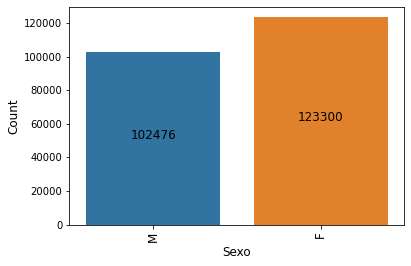

In [23]:
## Gráfico para ver la distribución sexo
%matplotlib inline
ax = sns.countplot(x='Sexo_Cd',   data= df1)
plt.xlabel('Sexo', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', size=12)
    
plt.show()

De acuerdo al gráfico anterior se puede observar que el sexo femenino es el que mas accede a seguros de salud comparado con el sexo masculino.

In [24]:
casos_cancer= df1['CANCER'].sum()
casos_epoc= df1['EPOC'].sum()
casos_diabetes= df1['DIABETES'].sum()
casos_hipertension= df1['HIPERTENSION'].sum()
casos_cardiovascular= df1['ENF_CARDIOVASCULAR'].sum()


In [25]:
# Calcular el total de casos
total_casos = casos_cancer + casos_diabetes + casos_epoc + casos_hipertension + casos_cardiovascular

# Calcular los porcentajes
porcentaje_cancer = (casos_cancer / total_casos) * 100
porcentaje_diabetes = (casos_diabetes / total_casos) * 100
porcentaje_epoc = (casos_epoc / total_casos) * 100
porcentaje_hipertension = (casos_hipertension / total_casos) * 100
porcentaje_cardiovascular = (casos_cardiovascular / total_casos) * 100

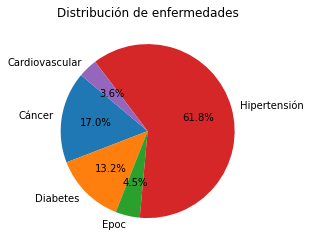

In [26]:
%matplotlib inline
enfermedades = ['Cáncer', 'Diabetes', 'Epoc','Hipertensión','Cardiovascular']
porcentajes = [porcentaje_cancer, porcentaje_diabetes, porcentaje_epoc,porcentaje_hipertension,porcentaje_cardiovascular]  # Puedes ajustar estos porcentajes según tus datos

# Crear el gráfico de torta
plt.pie(porcentajes, labels=enfermedades, autopct='%1.1f%%', startangle=140)

# Añadir un título
plt.title('Distribución de enfermedades')

# Mostrar el gráfico
plt.show()

Según el gráfico circular anterior, la enfermedad que tiene más de la mitad de las personas que tienen el seguro es la hipertensión y la que menos padecen son enfermedades cardiovasculares. 

In [27]:
df1['Regional']=df1['Regional'].astype('str')

In [28]:
df1['Regional']=df1['Regional'].replace({'50': 'Occidente', '40':'Norte','30':'Eje cafetero','20':'Centro','10':'Antioquia','-1':'Sin info','#N/D':'Sin info'})

In [29]:
df1 = df1.drop(df1[df1['Regional'] == 'Sin info'].index)

In [30]:
df_reg = df1.groupby(['Regional']).agg(encounters = ('Afiliado_Id', 'count')).reset_index().sort_values(['encounters'], ascending = False)

In [31]:
#Gráfico para ver como estan distribuidas las personas que tienen el seguro por región
fig = px.treemap(df_reg, path=['Regional'], values='encounters')
fig.show()

c:\Users\gabri\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


La mayor parte de las personas que tienen el seguro estan ubicadas en la región occidente, seguidamente en la región norte.

In [32]:
##Se utiliza para sacar la edad de los usuarios, se usa 2019 ya que es el año de la ultima reclamación
df1['EDAD']=2019 - df1['FechaNacimiento'].dt.year

In [33]:
##Se transforma la columna a entero para poder operarla
df1['EDAD']=df1['EDAD'].astype('int')

In [34]:
##Función para poder cambiar los datos de la variable edad, ya que hay unos datos que tenian unas edades atipicas por lo que se decidieron cambiar.
def agrupar_edad(edad):
    if edad>=100:
        return 99
    elif edad<=-1:
        return 0
    else:
        return edad

In [35]:
##Aplicación de la función edad
df1['EDAD']= df1['EDAD'].apply(agrupar_edad)

In [36]:
fig  = px.histogram(df1, x= 'EDAD', title= 'Histograma frecuencia de tipo de servicio por usuario')
fig.show()

En el gráfico anterior se puede observar que los usuarios que más compran seguros estan entre los 30 y 50 años, además de esto también se ve un alto volumen en los niños entre los 4 y 15 años, esto se puede deber a que cuando los padres compran el seguro de inmediato también afilian a sus hijos, es por ello que se ve un aumento en estos dos sectores, también se puede decir que los jovenes casi no compran seguros y los mayores de 80 años se ven en una baja proporción debido a que quizás hay muy poca población en esta edad o depronto también puede ser porque esto no es un negocio muy viable para los seguros, por lo tanto no se esfuerzan en vender estos seguros.

In [37]:
##Se elimina la columna fecha de nacimiento ya que vamos es a usar la Edad
df1=df1.drop('FechaNacimiento',axis=1)

##BASE DE UTILIZACIONES

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800232 entries, 0 to 800231
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Fecha_Reclamacion     800232 non-null  object
 1   Afiliado_Id           800232 non-null  int64 
 2   Reclamacion_Cd        800232 non-null  object
 3   Diagnostico_Codigo    800232 non-null  object
 4   Numero_Utilizaciones  800232 non-null  int64 
 5   Valor_Utilizaciones   800232 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 36.6+ MB


In [39]:
df2.isnull().sum()

Fecha_Reclamacion       0
Afiliado_Id             0
Reclamacion_Cd          0
Diagnostico_Codigo      0
Numero_Utilizaciones    0
Valor_Utilizaciones     0
dtype: int64

In [40]:
df2['Fecha_Reclamacion'] = pd.to_datetime(df2['Fecha_Reclamacion'])

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '28/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '30/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/11/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/08/2019' in DD/MM/YYYY format. Pro

In [41]:
df2['Diagnostico_Codigo']=df2['Diagnostico_Codigo'].replace({'0': '9'})

In [42]:
df2['Diagnostico_Codigo'].value_counts()

9       699132
Z017     17242
Z108      9453
E039      4018
R529      2099
         ...  
W542         1
K421         1
N178         1
B021         1
I607         1
Name: Diagnostico_Codigo, Length: 3410, dtype: int64

In [43]:
df2= df2.drop(df2[df2['Diagnostico_Codigo'] == '-1'].index)

In [44]:
df2['Diagnostico_Codigo'].value_counts()

9       699132
Z017     17242
Z108      9453
E039      4018
R529      2099
         ...  
W542         1
K421         1
N178         1
B021         1
I607         1
Name: Diagnostico_Codigo, Length: 3409, dtype: int64

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800219 entries, 0 to 800231
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Fecha_Reclamacion     800219 non-null  datetime64[ns]
 1   Afiliado_Id           800219 non-null  int64         
 2   Reclamacion_Cd        800219 non-null  object        
 3   Diagnostico_Codigo    800219 non-null  object        
 4   Numero_Utilizaciones  800219 non-null  int64         
 5   Valor_Utilizaciones   800219 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 42.7+ MB


In [46]:
##Agrupación para ver los 10 diagnosticos que más presentan los usuarios
df_diagnosticos = df2.groupby(['Diagnostico_Codigo']).agg(encounters = ('Afiliado_Id', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_diagnosticos10 = df_diagnosticos.head(10)

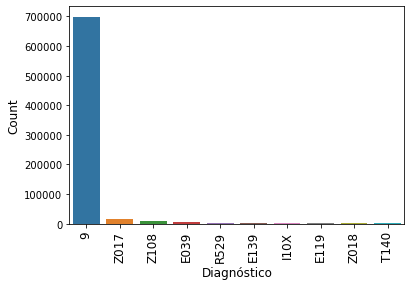

In [47]:
ax = sns.barplot(x=df_diagnosticos10['Diagnostico_Codigo'].value_counts().index,   y=df_diagnosticos10['encounters'],)
plt.xlabel('Diagnóstico', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

Teniendo en cuenta el gráfico anterior de barras, se observa que la gran mayoria de personas se encuentran con el diagnóstico pendiente, después de esta categoria el diagnóstico que más se repite es el Z017 es decir examen de laboratorio.

In [48]:
df2['Numero_Utilizaciones'].value_counts() 

1      703452
2       47393
3        7599
4        4870
5        3763
6        3492
10       3257
7        2902
8        2847
9        2519
11       2344
12       2197
13       1944
14       1736
15       1647
16       1549
17       1275
18       1076
19        859
20        792
21        508
22        407
0         371
23        362
24        269
25        196
26        141
28         87
27         85
30         57
29         48
32         31
31         29
33         15
35         13
36         13
34         11
40          9
37          8
39          7
50          5
38          5
46          4
66          4
41          3
60          3
43          3
42          2
210         2
55          2
44          2
100         1
45          1
70          1
52          1
Name: Numero_Utilizaciones, dtype: int64

In [49]:
# Se obtienen los conteos de cada valor
conteo_valores = df2['Numero_Utilizaciones'].value_counts()

# Primeros 10 valores más comunes 
top_n_valores = conteo_valores.head(10)

# Plotly: Gráfico de barras interactivo
fig = px.bar(top_n_valores, x=top_n_valores.index, y=top_n_valores.values, labels={'x': 'Número de utilizaciones', 'y': 'Frecuencia'}, title='Top 10 cantidad de utilizaciones más comunes')
fig.show()

Según el gráfico anterior se puede ver que lo más común es que las personas que compran el seguro de salud solo lo utilizan una vez.


In [50]:
df2['Valor_Utilizaciones'].value_counts() 

56916     63150
63364     51311
85312     34855
67208     22276
25172     21917
          ...  
357269        1
432010        1
104707        1
619368        1
148702        1
Name: Valor_Utilizaciones, Length: 143939, dtype: int64

In [51]:
max(df2['Valor_Utilizaciones'])

541000683

In [52]:
min(df2['Valor_Utilizaciones'])

2

In [53]:
##Agrupación para ver los 10 diagnosticos que más presentan los usuarios
df_valor = df2.groupby(['Valor_Utilizaciones']).agg(encounters = ('Afiliado_Id', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_valor10 = df_valor.head(10)


In [54]:
df_valor10

Valor_Utilizaciones  encounters
14547                56916       63150
17137                63364       51311
25396                85312       34855
18638                67208       22276
4705                 25172       21917
3844                 21204       18009
29983                97216       13318
8927                 42408       10839
32263               103664        9207
34910               111352        8081

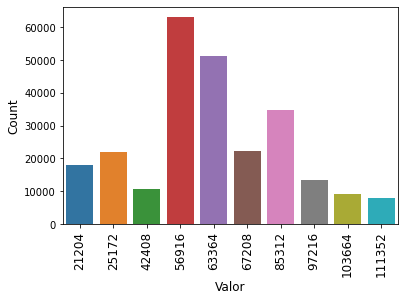

In [55]:
ax = sns.barplot(x=df_valor10['Valor_Utilizaciones'],   y=df_valor10['encounters'])
plt.xlabel('Valor', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

Los valores por utilización que más se pagan son 56916 y 63364 respectivamente.

UNIÓN DE LAS BASES DE DATOS

In [56]:
##Renombrar la columna Asegurado_Id de la base Asegurados_Expuestos (df)
df = df.rename(columns={'Asegurado_Id': 'Afiliado_Id'})

In [57]:
base_nueva=pd.merge(df, df1, how = 'left', on = 'Afiliado_Id').merge(df2, how = 'left', on = 'Afiliado_Id')
base_nueva.head()

Afiliado_Id  Poliza_Id FECHA_INICIO FECHA_CANCELACION  FECHA_FIN Sexo_Cd  \
0      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
1      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
2      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
3      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
4     22248110  195410143   2019-01-09        2019-12-31 2019-12-31       M   

    Regional  CANCER  EPOC  DIABETES  HIPERTENSION  ENF_CARDIOVASCULAR  EDAD  \
0  Occidente     0.0   0.0       0.0           0.0                 0.0  49.0   
1  Occidente     0.0   0.0       0.0           0.0                 0.0  49.0   
2  Occidente     0.0   0.0       0.0           0.0                 0.0  49.0   
3  Occidente     0.0   0.0       0.0           0.0                 0.0  49.0   
4     Centro     0.0   0.0       0.0           0.0                 0.0  45.0   

  Fecha_Reclamacion Reclamacion_Cd Diagnostico_Codigo  Numero_Utilizaciones  \
0        2019-09-23            R14               Z108                   1.0   
1        2019-05-09            R10                  9                   1.0   
2        2019-09-24            R14               Z017                   1.0   
3        2019-10-31            R10                  9                   1.0   
4               NaT            NaN                NaN                   NaN   

   Valor_Utilizaciones  
0             686077.0  
1              56916.0  
2             112162.0  
3              56916.0  
4                  NaN

In [58]:
base_nueva.isnull().sum()

Afiliado_Id                  0
Poliza_Id                    0
FECHA_INICIO                 0
FECHA_CANCELACION       511712
FECHA_FIN                    0
Sexo_Cd                    105
Regional                   105
CANCER                     105
EPOC                       105
DIABETES                   105
HIPERTENSION               105
ENF_CARDIOVASCULAR         105
EDAD                       105
Fecha_Reclamacion        67311
Reclamacion_Cd           67311
Diagnostico_Codigo       67311
Numero_Utilizaciones     67311
Valor_Utilizaciones      67311
dtype: int64

In [59]:
base =base_nueva.copy()

In [60]:
base.isnull().sum()

Afiliado_Id                  0
Poliza_Id                    0
FECHA_INICIO                 0
FECHA_CANCELACION       511712
FECHA_FIN                    0
Sexo_Cd                    105
Regional                   105
CANCER                     105
EPOC                       105
DIABETES                   105
HIPERTENSION               105
ENF_CARDIOVASCULAR         105
EDAD                       105
Fecha_Reclamacion        67311
Reclamacion_Cd           67311
Diagnostico_Codigo       67311
Numero_Utilizaciones     67311
Valor_Utilizaciones      67311
dtype: int64

In [61]:
base= base.drop('FECHA_CANCELACION',axis=1)

In [62]:
base=base.dropna()

In [63]:
base.isnull().sum()

Afiliado_Id             0
Poliza_Id               0
FECHA_INICIO            0
FECHA_FIN               0
Sexo_Cd                 0
Regional                0
CANCER                  0
EPOC                    0
DIABETES                0
HIPERTENSION            0
ENF_CARDIOVASCULAR      0
EDAD                    0
Fecha_Reclamacion       0
Reclamacion_Cd          0
Diagnostico_Codigo      0
Numero_Utilizaciones    0
Valor_Utilizaciones     0
dtype: int64

In [64]:
print(base_nueva.shape)
print(base.shape)

(890992, 18)
(823608, 17)


In [65]:
base

Afiliado_Id  Poliza_Id FECHA_INICIO  FECHA_FIN Sexo_Cd   Regional  \
0           1213170  113307876   2019-01-09 2019-12-15       M  Occidente   
1           1213170  113307876   2019-01-09 2019-12-15       M  Occidente   
2           1213170  113307876   2019-01-09 2019-12-15       M  Occidente   
3           1213170  113307876   2019-01-09 2019-12-15       M  Occidente   
5           7212095  192799506   2019-01-09 2019-12-31       F  Antioquia   
...             ...        ...          ...        ...     ...        ...   
890987     48708455  156289019   2019-01-09 2019-12-31       F  Occidente   
890988     30913881  201345473   2019-01-09 2019-12-31       F  Occidente   
890989     30913881  201345473   2019-01-09 2019-12-31       F  Occidente   
890990     30913881  201345473   2019-01-09 2019-12-31       F  Occidente   
890991     30913881  201345473   2019-01-09 2019-12-31       F  Occidente   

        CANCER  EPOC  DIABETES  HIPERTENSION  ENF_CARDIOVASCULAR  EDAD  \
0          0.0   0.0       0.0           0.0                 0.0  49.0   
1          0.0   0.0       0.0           0.0                 0.0  49.0   
2          0.0   0.0       0.0           0.0                 0.0  49.0   
3          0.0   0.0       0.0           0.0                 0.0  49.0   
5          0.0   0.0       0.0           0.0                 0.0  41.0   
...        ...   ...       ...           ...                 ...   ...   
890987     0.0   0.0       0.0           0.0                 0.0  18.0   
890988     0.0   0.0       0.0           0.0                 0.0  16.0   
890989     0.0   0.0       0.0           0.0                 0.0  16.0   
890990     0.0   0.0       0.0           0.0                 0.0  16.0   
890991     0.0   0.0       0.0           0.0                 0.0  16.0   

       Fecha_Reclamacion Reclamacion_Cd Diagnostico_Codigo  \
0             2019-09-23            R14               Z108   
1             2019-05-09            R10                  9   
2             2019-09-24            R14               Z017   
3             2019-10-31            R10                  9   
5             2019-09-09            R10                  9   
...                  ...            ...                ...   
890987        2019-01-07             R9                  9   
890988        2019-02-11            R18                  9   
890989        2019-01-12             R9                  9   
890990        2019-08-28            R10                  9   
890991        2019-10-28             R9                  9   

        Numero_Utilizaciones  Valor_Utilizaciones  
0                        1.0             686077.0  
1                        1.0              56916.0  
2                        1.0             112162.0  
3                        1.0              56916.0  
5                        1.0              56916.0  
...                      ...                  ...  
890987                   1.0              44764.0  
890988                  11.0             186124.0  
890989                   1.0              72912.0  
890990                   2.0             192944.0  
890991                   1.0              72912.0  

[823608 rows x 17 columns]

In [66]:
base=pd.merge(base, df4, how = 'left', on = 'Reclamacion_Cd')

In [67]:
base= base.drop('Reclamacion_Cd', axis=1)

In [68]:
###Se crea una columna nueva con la duración en meses del seguro haciendo la diferencia entre la fecha_inicio y fecha_fin
## Se usa fecha_fin porque a diferencia de fecha_cancelación no contiene nulos
base['Duracion']= base['FECHA_FIN'].dt.month - base['FECHA_INICIO'].dt.month

In [69]:
base.head()

Afiliado_Id  Poliza_Id FECHA_INICIO  FECHA_FIN Sexo_Cd   Regional  CANCER  \
0      1213170  113307876   2019-01-09 2019-12-15       M  Occidente     0.0   
1      1213170  113307876   2019-01-09 2019-12-15       M  Occidente     0.0   
2      1213170  113307876   2019-01-09 2019-12-15       M  Occidente     0.0   
3      1213170  113307876   2019-01-09 2019-12-15       M  Occidente     0.0   
4      7212095  192799506   2019-01-09 2019-12-31       F  Antioquia     0.0   

   EPOC  DIABETES  HIPERTENSION  ENF_CARDIOVASCULAR  EDAD Fecha_Reclamacion  \
0   0.0       0.0           0.0                 0.0  49.0        2019-09-23   
1   0.0       0.0           0.0                 0.0  49.0        2019-05-09   
2   0.0       0.0           0.0                 0.0  49.0        2019-09-24   
3   0.0       0.0           0.0                 0.0  49.0        2019-10-31   
4   0.0       0.0           0.0                 0.0  41.0        2019-09-09   

  Diagnostico_Codigo  Numero_Utilizaciones  Valor_Utilizaciones  \
0               Z108                   1.0             686077.0   
1                  9                   1.0              56916.0   
2               Z017                   1.0             112162.0   
3                  9                   1.0              56916.0   
4                  9                   1.0              56916.0   

          Reclamacion_Desc  Duracion  
0  EXAMENES DE DIAGNOSTICO        11  
1         CONSULTA EXTERNA        11  
2  EXAMENES DE DIAGNOSTICO        11  
3         CONSULTA EXTERNA        11  
4         CONSULTA EXTERNA        11

In [70]:
# Función para agrupar edades en categorías usando if
def agrupar_edad(edad):
    if edad < 6:
        return '0-5'
    elif edad < 12:
        return '6-11'
    elif edad < 18:
        return '12-17'
    elif edad < 29:
        return '18-28'
    elif edad < 50:
        return '29-49'
    elif edad < 80:
        return '50-79'
    else:
        return '80-99'

# Aplicar la función a la columna 'edad' y crear una nueva columna 'Grupo de edad'
base['EDAD'] = base['EDAD'].apply(agrupar_edad)

In [94]:
# Se obtienen los conteos de cada valor
conteo_valores1 = base['EDAD'].value_counts()

# Primeros 10 valores más comunes 
top_n_valores = conteo_valores1.head(10)

# Plotly: Gráfico de barras interactivo
fig = px.bar(top_n_valores, x=top_n_valores.index, y=top_n_valores.values, labels={'x': 'Edad', 'y': 'Frecuencia'}, title='Frecuencia de edades')
fig.show()

In [71]:
# Función para agrupar edades en categorías usando if
def agrupar_duracion(duracion):
    if duracion < 4:
        return 'primer cuatrimestre'
    elif duracion < 8:
        return 'segundo cuatrimestre'
    else:
        return 'tercer cuatrimestre'

# Aplicar la función a la columna 'edad' y crear una nueva columna 'Grupo de edad'
base['Duracion'] = base['Duracion'].apply(agrupar_duracion)

In [72]:
# Se crea una copia para posteriormente realizar los expuetos
base1 = base.copy()

In [73]:
# Se eliminan las variables que no se tendran en cuenta para el modelo por su poco aporte 
base= base.drop(['FECHA_INICIO','FECHA_FIN','Poliza_Id','Afiliado_Id','Fecha_Reclamacion','Diagnostico_Codigo','Numero_Utilizaciones'], axis=1)

In [74]:
base.head()

Sexo_Cd   Regional  CANCER  EPOC  DIABETES  HIPERTENSION  \
0       M  Occidente     0.0   0.0       0.0           0.0   
1       M  Occidente     0.0   0.0       0.0           0.0   
2       M  Occidente     0.0   0.0       0.0           0.0   
3       M  Occidente     0.0   0.0       0.0           0.0   
4       F  Antioquia     0.0   0.0       0.0           0.0   

   ENF_CARDIOVASCULAR   EDAD  Valor_Utilizaciones         Reclamacion_Desc  \
0                 0.0  29-49             686077.0  EXAMENES DE DIAGNOSTICO   
1                 0.0  29-49              56916.0         CONSULTA EXTERNA   
2                 0.0  29-49             112162.0  EXAMENES DE DIAGNOSTICO   
3                 0.0  29-49              56916.0         CONSULTA EXTERNA   
4                 0.0  29-49              56916.0         CONSULTA EXTERNA   

              Duracion  
0  tercer cuatrimestre  
1  tercer cuatrimestre  
2  tercer cuatrimestre  
3  tercer cuatrimestre  
4  tercer cuatrimestre

In [75]:
for columna in base.columns:
    if base[columna].dtype == 'float64':
        base[columna] = base[columna].astype('int64')

In [76]:
# Transformar las variables a categóricas
base['CANCER'] = base['CANCER'].astype(object)
base['EPOC'] = base['EPOC'].astype(object)
base['DIABETES'] = base['DIABETES'].astype(object)
base['HIPERTENSION'] = base['HIPERTENSION'].astype(object)
base['ENF_CARDIOVASCULAR'] = base['ENF_CARDIOVASCULAR'].astype(object)

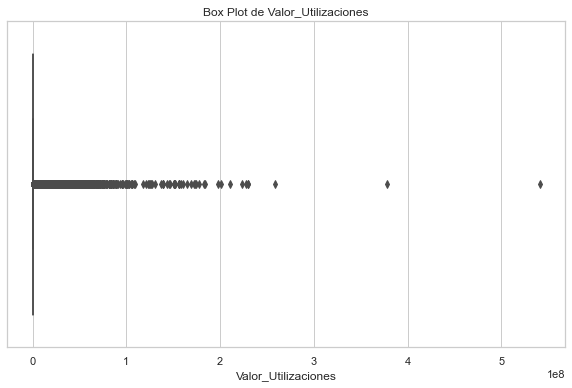

In [77]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  
sns.boxplot(x=base['Valor_Utilizaciones'])

# Añadir título y etiquetas
plt.title('Box Plot de Valor_Utilizaciones')
plt.xlabel('Valor_Utilizaciones')

# Mostrar el plot
plt.show()

In [101]:
# Supongamos que df es tu DataFrame y 'VALOR_UTILIZACIONES' es la columna que deseas filtrar
columna = 'Valor_Utilizaciones'

# Calcular el rango intercuartílico
Q1 = base[columna].quantile(0.25)
Q3 = base[columna].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para excluir valores atípicos
df_filtrado = base[(base[columna] >= limite_inferior) & (base[columna] <= limite_superior)]

# Visualizar el box plot después de la eliminación de valores atípicos
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_filtrado[columna])
plt.title('Box Plot sin valores atípicos')
plt.xlabel(columna)
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\3016675315.py:23: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [102]:
# Calcular el rango intercuartílico para el DataFrame filtrado
Q1_filtrado = df_filtrado[columna].quantile(0.25)
Q3_filtrado = df_filtrado[columna].quantile(0.75)
IQR_filtrado = Q3_filtrado - Q1_filtrado

# Definir nuevos límites para identificar valores atípicos en el DataFrame filtrado
limite_inferior_filtrado = Q1_filtrado - 1.5 * IQR_filtrado
limite_superior_filtrado = Q3_filtrado + 1.5 * IQR_filtrado

# Filtrar el DataFrame nuevamente para excluir valores atípicos en el segundo paso
df_filtrado_segundo = df_filtrado[(df_filtrado[columna] >= limite_inferior_filtrado) & (df_filtrado[columna] <= limite_superior_filtrado)]

# Visualizar el box plot después del segundo filtrado
sns.boxplot(x=df_filtrado_segundo[columna])
plt.title('Box Plot después del segundo filtrado')
plt.xlabel(columna)
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\2119909037.py:17: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [103]:
# Calcular el rango intercuartílico para el DataFrame filtrado por segunda vez
Q1_filtrado_segundo = df_filtrado_segundo[columna].quantile(0.25)
Q3_filtrado_segundo = df_filtrado_segundo[columna].quantile(0.75)
IQR_filtrado_segundo = Q3_filtrado_segundo - Q1_filtrado_segundo

# Definir nuevos límites para identificar valores atípicos en el DataFrame filtrado por segunda vez
limite_inferior_filtrado_segundo = Q1_filtrado_segundo - 1.5 * IQR_filtrado_segundo
limite_superior_filtrado_segundo = Q3_filtrado_segundo + 1.5 * IQR_filtrado_segundo

# Filtrar el DataFrame nuevamente para excluir valores atípicos en el tercer paso
df_filtrado_tercero = df_filtrado_segundo[(df_filtrado_segundo[columna] >= limite_inferior_filtrado_segundo) & (df_filtrado_segundo[columna] <= limite_superior_filtrado_segundo)]

# Visualizar el box plot después del tercer filtrado
sns.boxplot(x=df_filtrado_tercero[columna])
plt.title('Box Plot después del tercer filtrado')
plt.xlabel(columna)
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\2902816315.py:17: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [104]:
# Calcular el rango intercuartílico para el DataFrame filtrado por tercer vez
Q1_filtrado_tercero = df_filtrado_tercero[columna].quantile(0.25)
Q3_filtrado_tercero = df_filtrado_tercero[columna].quantile(0.75)
IQR_filtrado_tercero = Q3_filtrado_tercero - Q1_filtrado_tercero

# Definir nuevos límites para identificar valores atípicos en el DataFrame filtrado por tercer vez
limite_inferior_filtrado_tercero = Q1_filtrado_tercero - 1.5 * IQR_filtrado_tercero
limite_superior_filtrado_tercero = Q3_filtrado_tercero + 1.5 * IQR_filtrado_tercero

# Filtrar el DataFrame nuevamente para excluir valores atípicos en el cuarto paso
df_filtrado_cuarto = df_filtrado_tercero[(df_filtrado_tercero[columna] >= limite_inferior_filtrado_tercero) & (df_filtrado_tercero[columna] <= limite_superior_filtrado_tercero)]

# Visualizar el box plot después del cuarto filtrado
sns.boxplot(x=df_filtrado_cuarto[columna])
plt.title('Box Plot después del cuarto filtrado')
plt.xlabel(columna)
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\3739187261.py:17: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [112]:
##Obtener dummies
basedumi = pd.get_dummies(df_filtrado_cuarto)

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [121]:
basedumi

Valor_Utilizaciones  Sexo_Cd_F  Sexo_Cd_M  Regional_Antioquia  \
1                     56916          0          1                   0   
2                    112162          0          1                   0   
3                     56916          0          1                   0   
4                     56916          1          0                   1   
5                     63364          1          0                   1   
...                     ...        ...        ...                 ...   
823601                10416          1          0                   0   
823602                63364          1          0                   0   
823603                44764          1          0                   0   
823605                72912          1          0                   0   
823607                72912          1          0                   0   

        Regional_Centro  Regional_Eje cafetero  Regional_Norte  \
1                     0                      0               0   
2                     0                      0               0   
3                     0                      0               0   
4                     0                      0               0   
5                     0                      0               0   
...                 ...                    ...             ...   
823601                0                      0               0   
823602                0                      0               0   
823603                0                      0               0   
823605                0                      0               0   
823607                0                      0               0   

        Regional_Occidente  CANCER_0  CANCER_1  ...  \
1                        1         1         0  ...   
2                        1         1         0  ...   
3                        1         1         0  ...   
4                        0         1         0  ...   
5                        0         1         0  ...   
...                    ...       ...       ...  ...   
823601                   1         1         0  ...   
823602                   1         1         0  ...   
823603                   1         1         0  ...   
823605                   1         1         0  ...   
823607                   1         1         0  ...   

        Reclamacion_Desc_TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO  \
1                                                       0              
2                                                       0              
3                                                       0              
4                                                       0              
5                                                       0              
...                                                   ...              
823601                                                  0              
823602                                                  0              
823603                                                  0              
823605                                                  0              
823607                                                  0              

        Reclamacion_Desc_TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE  \
1                                                       0                    
2                                                       0                    
3                                                       0                    
4                                                       0                    
5                                                       0                    
...                                                   ...                    
823601                                                  0                    
823602                                                  0                    
823603                                                  0                    
823605                          

MODELOS

In [113]:
X =basedumi.drop(columns = 'Valor_Utilizaciones', axis = 1)
y = basedumi['Valor_Utilizaciones'].values.reshape(-1,1)

In [114]:
##Se escala las variables para poder procesar los datos e implementar el modelo
scaled_X = preprocessing.StandardScaler().fit_transform(X)

In [115]:
###Separación datos de entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

REGRESION LINEAL

In [118]:
regre = linear_model.LinearRegression()
regre.fit(X_train,y_train)

print('Intercept: ',regre.intercept_)
print('Coeficientes: ',list(zip(X.columns, regre.coef_.flatten(),)))
print('R^2: ',regre.score(X_test,y_test))

Intercept:  [65032.00473901]
Coeficientes:  [('Sexo_Cd_F', -128943057827.74686), ('Sexo_Cd_M', -128943057723.23799), ('Regional_Antioquia', 572668751646072.2), ('Regional_Centro', 695810016618559.6), ('Regional_Eje cafetero', 296230931056700.06), ('Regional_Norte', 676832945847529.9), ('Regional_Occidente', 915747211901650.9), ('CANCER_0', 3.131857232861178e+16), ('CANCER_1', 3.1318572328611644e+16), ('EPOC_0', -5602174032129304.0), ('EPOC_1', -5602174032129149.0), ('DIABETES_0', 2.150208230558129e+16), ('DIABETES_1', 2.1502082305582264e+16), ('HIPERTENSION_0', 3.520243925963903e+16), ('HIPERTENSION_1', 3.520243925963934e+16), ('ENF_CARDIOVASCULAR_0', -1.8510616353738668e+16), ('ENF_CARDIOVASCULAR_1', -1.851061635373928e+16), ('EDAD_0-5', -2994181813083630.0), ('EDAD_12-17', -1788701890375795.0), ('EDAD_18-28', -2729535294848978.0), ('EDAD_29-49', -4524554862222733.0), ('EDAD_50-79', -4083302351850904.5), ('EDAD_6-11', -2095918396510242.8), ('EDAD_80-99', -1201810133565176.0), ('Reclam

In [119]:
prediccion = regre.predict(X_test)
print('El costo medico es ',prediccion[24])

El costo medico es  [78072.00473901]


In [120]:
# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, prediccion)
print(f'MSE: {mse:.2f}')

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

# Calcular el R-cuadrado (Coefficient of Determination)
r2 = r2_score(y_test, prediccion)
print(f'R-squared (R²): {r2:.2f}')

MSE: 879835544.59
RMSE: 29662.02
R-squared (R²): 0.16


RANDOM FOREST REGRESSOR

In [96]:
rf = RandomForestRegressor(random_state=43)
rf.fit(X_train,y_train)

C:\Users\gabri\AppData\Local\Temp\ipykernel_19884\2917876255.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=43)

In [97]:
print('Importancia de las características: ', list(zip(X.columns, rf.feature_importances_)))
print('R^2: ', rf.score(X_test,y_test))

Importancia de las características:  [('Sexo_Cd_F', 0.022025520131346187), ('Sexo_Cd_M', 0.02146553239380043), ('Regional_Antioquia', 0.01424757825513385), ('Regional_Centro', 0.019838897638132437), ('Regional_Eje cafetero', 0.004657041983508876), ('Regional_Norte', 0.02513745234720046), ('Regional_Occidente', 0.028184092250621108), ('CANCER_0', 0.01748372707742285), ('CANCER_1', 0.019765948584342375), ('EPOC_0', 0.004829192123962377), ('EPOC_1', 0.00451624598606425), ('DIABETES_0', 0.015073255645597774), ('DIABETES_1', 0.012496468536114518), ('HIPERTENSION_0', 0.07082207187312752), ('HIPERTENSION_1', 0.05950758769915539), ('ENF_CARDIOVASCULAR_0', 0.006423300549164436), ('ENF_CARDIOVASCULAR_1', 0.0070580394880544635), ('EDAD_0-5', 0.009035895971789576), ('EDAD_12-17', 0.001474695676468678), ('EDAD_18-28', 0.014398784913935713), ('EDAD_29-49', 0.019014743342914676), ('EDAD_50-79', 0.023578759376763528), ('EDAD_6-11', 0.0017194988719891838), ('EDAD_80-99', 0.011295566421571883), ('Reclam

In [98]:
prediccion1 = rf.predict(X_test)
print('El costo medico es ',prediccion1[1])

El costo medico es  230855.8764864286


In [99]:
# Calcular el MSE (Mean Squared Error)
mse1 = mean_squared_error(y_test, prediccion)
print(f'MSE: {mse1:.2f}')

# Calcular el RMSE (Root Mean Squared Error)
rmse1 = np.sqrt(mse1)
print(f'RMSE: {rmse1:.2f}')

# Calcular el R-cuadrado (Coefficient of Determination)
r21 = r2_score(y_test, prediccion1)
print(f'R-squared (R²): {r21:.2f}')

MSE: 2510634271598.74
RMSE: 1584498.11
R-squared (R²): 0.10


DECISION TREE REGRESSOR

In [122]:
m_tc = tree.DecisionTreeRegressor(random_state=42)
m_tc.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [123]:
print('Importancia de las características: ', list(zip(X.columns, m_tc.feature_importances_)))
print('R^2:', m_tc.score(X_test,y_test))

Importancia de las características:  [('Sexo_Cd_F', 0.004467684593433364), ('Sexo_Cd_M', 0.006982428592829188), ('Regional_Antioquia', 0.009496360324150332), ('Regional_Centro', 0.015121923521103217), ('Regional_Eje cafetero', 0.0025832457039381054), ('Regional_Norte', 0.00511574514808754), ('Regional_Occidente', 0.009299368289102737), ('CANCER_0', 0.0037554431960606463), ('CANCER_1', 0.0037069713930043056), ('EPOC_0', 0.0037062087995169265), ('EPOC_1', 0.002869071389518019), ('DIABETES_0', 0.02406419661250416), ('DIABETES_1', 0.0032407761620743235), ('HIPERTENSION_0', 0.006284220576422841), ('HIPERTENSION_1', 0.0049439179078031685), ('ENF_CARDIOVASCULAR_0', 0.0029901356618027178), ('ENF_CARDIOVASCULAR_1', 0.002306132860391779), ('EDAD_0-5', 0.010359819730871307), ('EDAD_12-17', 0.0035479486543985718), ('EDAD_18-28', 0.0024752160363639463), ('EDAD_29-49', 0.006701897636390652), ('EDAD_50-79', 0.009586207529635087), ('EDAD_6-11', 0.0032428065984315304), ('EDAD_80-99', 0.0057510743468884

In [124]:
prediccion3 = m_tc.predict(X_test)
print('El costo medico es ',prediccion3[1])

El costo medico es  31807.921893491126


In [125]:
# Calcular el MSE (Mean Squared Error)
mse2 = mean_squared_error(y_test, prediccion3)
print(f'MSE: {mse2:.2f}')

# Calcular el RMSE (Root Mean Squared Error)
rmse2 = np.sqrt(mse2)
print(f'RMSE: {rmse2:.2f}')

# Calcular el R-cuadrado (Coefficient of Determination)
r22 = r2_score(y_test, prediccion3)
print(f'R-squared (R²): {r22:.2f}')

MSE: 864768941.66
RMSE: 29406.95
R-squared (R²): 0.18


COEFICIENTES VARIABLES

In [130]:
# Suponiendo que X.columns contiene los nombres de las variables y rf.feature_importances_ contiene las importancias
variables = X.columns
coeficiente = regre.coef_.flatten()

# Crear el DataFrame con nombres de columnas
df_importancia = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficiente})

# Mostrar el DataFrame
df_importancia

Variable   Coeficiente
0                                           Sexo_Cd_F -1.289431e+11
1                                           Sexo_Cd_M -1.289431e+11
2                                  Regional_Antioquia  5.726688e+14
3                                     Regional_Centro  6.958100e+14
4                               Regional_Eje cafetero  2.962309e+14
5                                      Regional_Norte  6.768329e+14
6                                  Regional_Occidente  9.157472e+14
7                                            CANCER_0  3.131857e+16
8                                            CANCER_1  3.131857e+16
9                                              EPOC_0 -5.602174e+15
10                                             EPOC_1 -5.602174e+15
11                                         DIABETES_0  2.150208e+16
12                                         DIABETES_1  2.150208e+16
13                                     HIPERTENSION_0  3.520244e+16
14                                     HIPERTENSION_1  3.520244e+16
15                               ENF_CARDIOVASCULAR_0 -1.851062e+16
16                               ENF_CARDIOVASCULAR_1 -1.851062e+16
17                                           EDAD_0-5 -2.994182e+15
18                                         EDAD_12-17 -1.788702e+15
19                                         EDAD_18-28 -2.729535e+15
20                                         EDAD_29-49 -4.524555e+15
21                                         EDAD_50-79 -4.083302e+15
22                                          EDAD_6-11 -2.095918e+15
23                                         EDAD_80-99 -1.201810e+15
24                Reclamacion_Desc_ATENCION DEL PARTO  5.482998e+13
25  Reclamacion_Desc_ATENCION INTEGRAL DE SALUD ME...  1.226024e+14
26  Reclamacion_Desc_CIRUGIA AMBULATORIA POR ACCID...  1.064572e+15
27  Reclamacion_Desc_CIRUGIA AMBULATORIA POR ENFER...  1.257096e+15
28     Reclamacion_Desc_COBERTURA PROGRAMA PALIATIVOS  3.165616e+13
29                      Reclamacion_Desc_CONCILIACION  7.353018e+14
30             Reclamacion_Desc_CONSULTA DE URGENCIAS  7.572192e+15
31                  Reclamacion_Desc_CONSULTA EXTERNA  1.244310e+16
32              Reclamacion_Desc_CONSULTAS PRENATALES  2.733782e+15
33           Reclamacion_Desc_EXAMENES DE DIAGNOSTICO  7.956775e+15
34            Reclamacion_Desc_FISIOTERAPIA ILIMITADA  8.223121e+15
35                    Reclamacion_Desc_INFILTRACIONES  7.507838e+14
36               Reclamacion_Desc_LABORATORIO CLINICO  7.513543e+15
37                       Reclamacion_Desc_ODONTOLOGÍA  2.901140e+14
38                              Reclamacion_Desc_PAMD  4.222853e+14
39                   Reclamacion_Desc_Sin Informacion  1.176783e+15
40            Reclamacion_Desc_TRASLADO EN AMBULANCIA  1.143675e+15
41  Reclamacion_Desc_TRATAMIENTO AMBULATORIO POR C...  5.757795e+14
42  Reclamacion_Desc_TRATAMIENTO MEDICO AMBULATORI...  1.916186e+15
43  Reclamacion_Desc_TRATAMIENTO MEDICO AMBULATORI...  3.510491e+14
44  Reclamacion_Desc_TRATAMIENTO MEDICO HOSPITALAR...  5.482998e+13
45  Reclamacion_Desc_TRATAMIENTO MEDICO HOSPITALAR...  8.375391e+13
46  Reclamacion_Desc_TRATAMIENTO MEDICO HOSPITALAR...  4.374295e+14
47  Reclamacion_Desc_TRATAMIENTO MEDICO HOSPITALAR...  4.476853e+13
48  Reclamacion_Desc_TRATAMIENTO QUIRURGICO HOSPIT...  5.482998e+13
49  Reclamacion_Desc_TRATAMIENTO QUIRURGICO HOSPIT...  4.476853e+13
50  Reclamacion_Desc_TRATAMIENTO QUIRURGICO HOSPIT...  2.629413e+14
51  Reclamacion_Desc_TRATAMIENTOS AMBULATORIOS ESP...  7.078509e+13
52          Reclamacion_Desc_TRATAMIENTOS ESPECIFICOS  2.990028e+15
53                        Reclamacion_Desc_VACUNACION  3.181147e+14
54                       Duracion_primer cuatrimestre -1.284871e+16
55                      Duracion_segundo cuatrimestre -5.259782e+15
56                       Duracion_tercer cuatrimestre -1.380690e+16

In [146]:
df_importancia.to_csv('C:\\Users\\gabri\\Documents\\df_importancia_p.csv', index = False, sep= ';', decimal= '.')

EXPUESTOS

In [ ]:
base1= base1.drop(['FECHA_INICIO','FECHA_FIN','Poliza_Id','Fecha_Reclamacion','Diagnostico_Codigo','Numero_Utilizaciones'], axis=1)

In [140]:
base1 = base1.drop_duplicates(subset=['Afiliado_Id'], keep= 'first')

In [141]:
base1 = base1.drop(['Valor_Utilizaciones'], axis= 1)

In [142]:
base1['Expuestos']= base1.groupby(['Sexo_Cd','Regional','CANCER','EPOC','DIABETES','HIPERTENSION',
                                  'ENF_CARDIOVASCULAR','EDAD','Reclamacion_Desc','Duracion'])['Afiliado_Id'].transform('count')

In [143]:
base1 = base1.drop_duplicates(subset=['Sexo_Cd','Regional','CANCER','EPOC','DIABETES','HIPERTENSION',
                                  'ENF_CARDIOVASCULAR','EDAD','Reclamacion_Desc','Duracion'], keep= 'first')

In [144]:
base1['Sexo_Cd']= base1['Sexo_Cd'].replace({'F': 'Femenino','M': 'Masculino'})
base1['CANCER']= base1['CANCER'].replace({1:'Tiene Cancer', 0: 'No tiene Cancer'})
base1['EPOC']= base1['EPOC'].replace({1:'Tiene Epoc', 0: 'No tiene Epoc'})
base1['DIABETES']= base1['DIABETES'].replace({1:'Tiene Diabetes', 0: 'No tiene Diabetes'})
base1['HIPERTENSION']= base1['HIPERTENSION'].replace({1:'Tiene Hipertension', 0: 'No tiene Hipertension'})
base1['ENF_CARDIOVASCULAR']= base1['ENF_CARDIOVASCULAR'].replace({1:'Tiene Enf_Cardiovascular', 0: 'No tiene Enf_Cardiovascular'})

In [145]:
base1.to_csv('C:\\Users\\gabri\\Documents\\expuestos.csv', index = False, sep= ';', decimal= ',')